# Predicting  Heart Disease using machine learning
# Approch :
* Problem Definition
* Data
* Evaluation
* Features
* Modelling


## Problem Definition :
       Given medical parameters  about the patient, We have to predict patient have heart disease or not
## Data :
       The original data is taken from UCI Machine Learning Repository : https://archive.ics.uci.edu/dataset/45/heart+disease
       The Kaggle version : https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
## Evaluation : 
       We have to reach the 95% accuracy at predicting whether patient have heart disease or not
## Features : 
      There are 13 attributes

      1. age: age in years
      2. sex: sex (1 = male; 0 = female)
      3. cp: chest pain type
        -- Value 0: typical angina
        -- Value 1: atypical angina
        -- Value 2: non-anginal pain
        -- Value 3: asymptomatic
     4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
     5. chol: serum cholestoral in mg/dl
     6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
     7. restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
     8. thalach: maximum heart rate achieved
     9. exang: exercise induced angina (1 = yes; 0 = no)
     10. oldpeak = ST depression induced by exercise relative to rest
     11. slope: the slope of the peak exercise ST segment
        -- Value 0: upsloping
        -- Value 1: flat
        -- Value 2: downsloping
     12. ca: number of major vessels (0-3) colored by flourosopy
     13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect and the label
     14. target : 0 = no disease, 1 = disease

## Prepating Tools :


In [48]:
# Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plots to apppear inside the notebook
%matplotlib inline

# Models from Sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score, f1_score
from sklearn.metrics import RocCurveDisplay



# Load Data

In [49]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [50]:
# Exploratory Data Analysis (EDA)
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

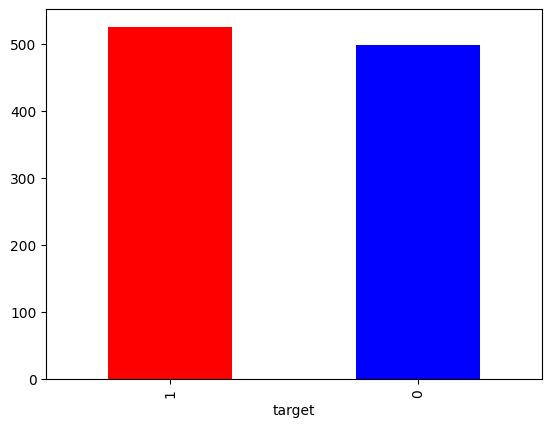

In [51]:
df["target"].value_counts().plot(kind="bar",color=["red","blue"]);

In [52]:
# Getting info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [53]:
# checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [54]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## heart disesase frequency by sex 

In [55]:
df["sex"].value_counts() # male = 1, female = 0

sex
1    713
0    312
Name: count, dtype: int64

In [56]:
# compare the target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300


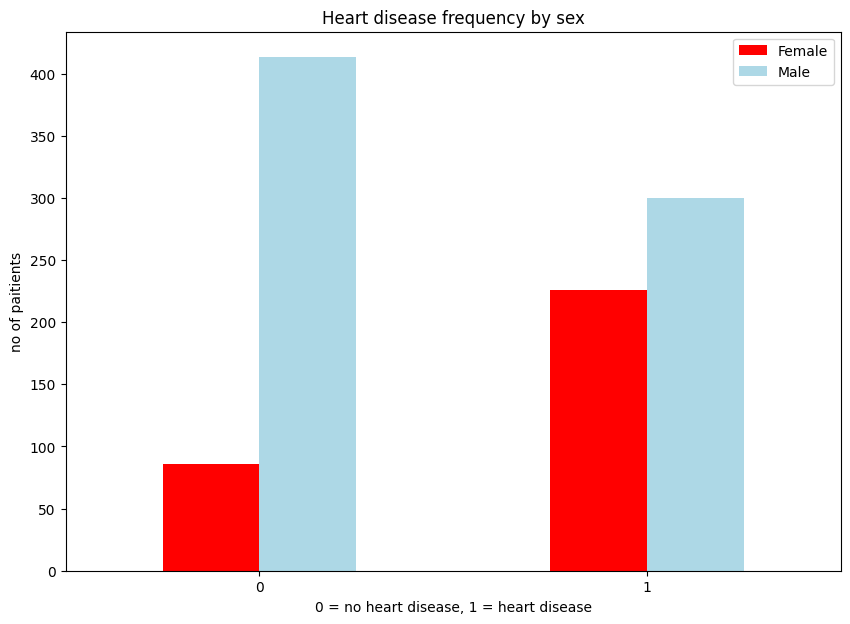

In [57]:
# visualize it
pd.crosstab(df.target,df.sex).plot(kind="bar",color=["red","lightblue"],figsize=(10,7));
plt.title("Heart disease frequency by sex")
plt.xlabel("0 = no heart disease, 1 = heart disease")
plt.ylabel("no of paitients")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);


# Age vs Max heart rate for heart disease

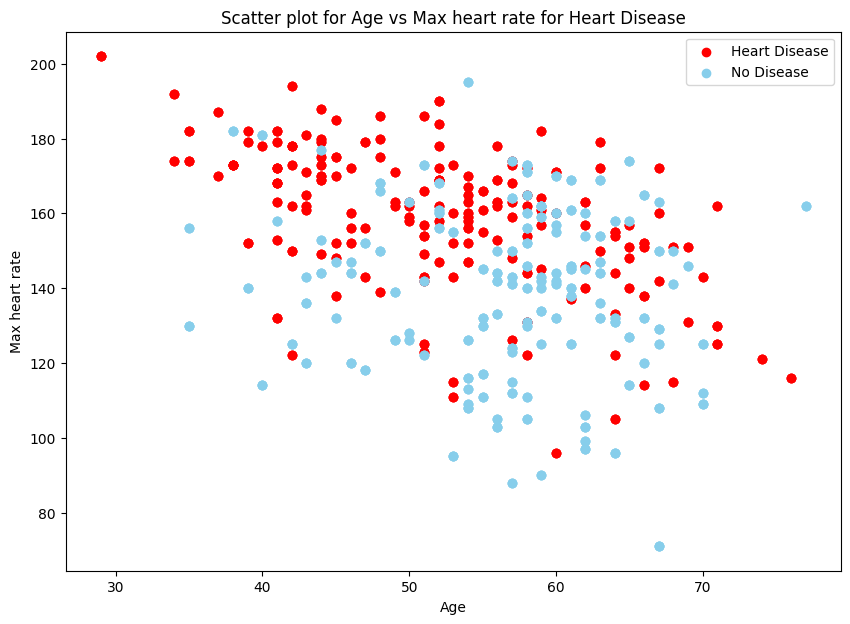

In [58]:
plt.figure(figsize=(10,7))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color="red")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color="skyblue")

plt.title("Scatter plot for Age vs Max heart rate for Heart Disease")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Heart Disease","No Disease"]);

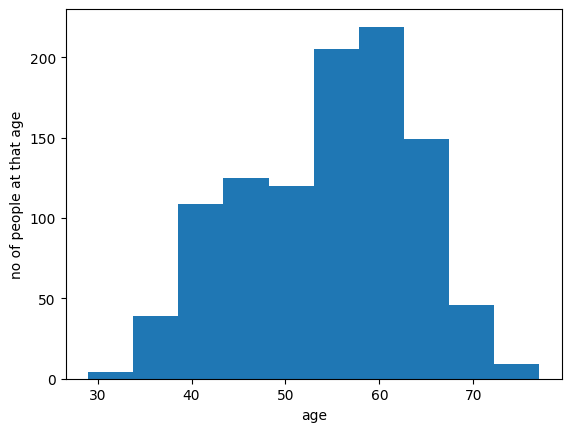

In [59]:
# Distribution of age column with histogram
plt.hist(df["age"])
plt.xlabel("age")
plt.ylabel("no of people at that age");

### Heart Disease Frequency per Chest pain type
 * cp: chest pain type:


        -- Value 0: typical angina
        -- Value 1: atypical angina
        -- Value 2: non-anginal pain
        -- Value 3: asymptomatic

In [60]:
pd.crosstab(df["cp"],df["target"]) # this conclude that patient with cp type 2 have higer frquency of heart disease

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


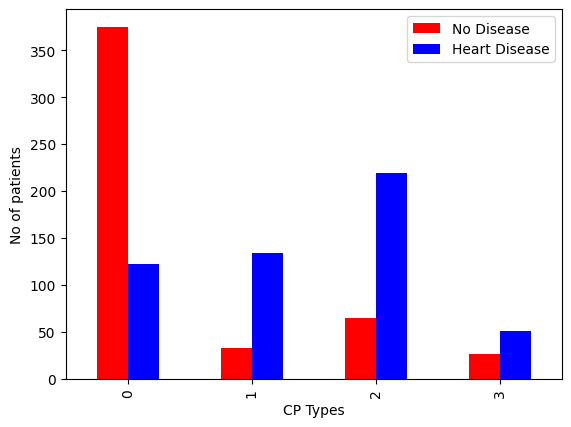

In [61]:
pd.crosstab(df["cp"],df["target"]).plot(kind="bar",color=["red","blue"])
plt.xlabel("CP Types")
plt.ylabel("No of patients")
plt.legend(["No Disease","Heart Disease"]);

In [62]:
# Making Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


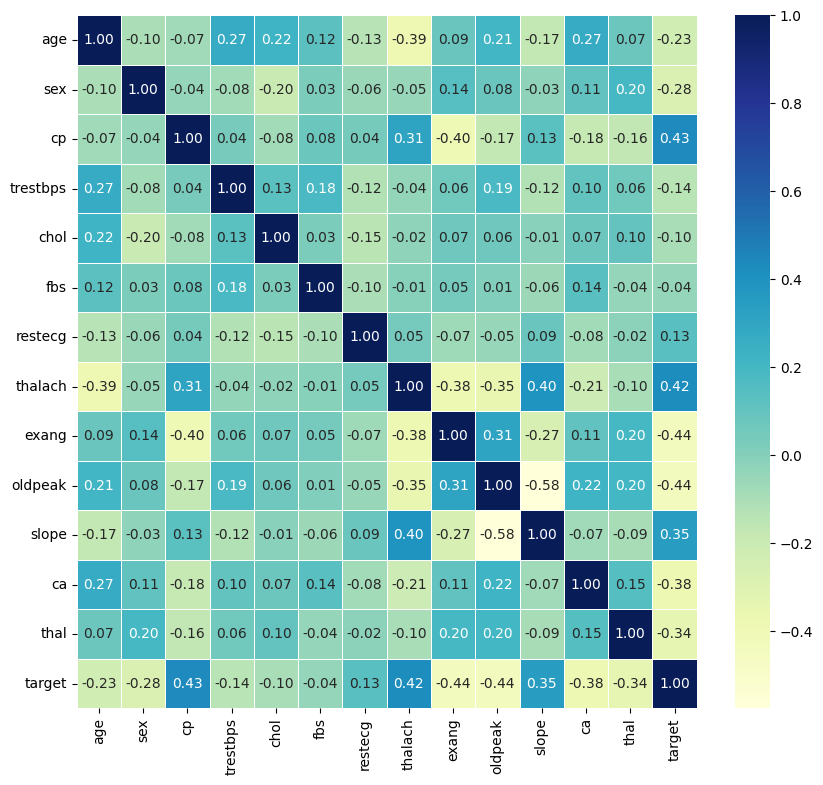

In [63]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(10,9))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths = 0.5,
                fmt =".2f",
                cmap = "YlGnBu");

### Split the data into Features(x) and Labels(y)

In [64]:
x = df.drop("target",axis=1) 
y = df["target"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

### Build the model 
We are building 3 models
 * Logestic Regression
 * K-Nearest Neighbors Classifier
 * RandomForestClassifier

In [65]:
# Putting models into Dictionary
models ={"Logestic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "RandomForest":RandomForestClassifier()}

# Create a function to Fit and Score the models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fit and Evaluate the machine learning models 
    """
    np.random.seed(32)
    
    # Dictionary to keep model scores
    model_scores= {}

    # Loop through models
    for name, models in models.items():
        # Fit the model to data
        models.fit(x_train,y_train)
        # Evaluate the model and keep the score in the dictionary created above 
        model_scores[name] = models.score(x_test,y_test)
    return model_scores

In [66]:
model_scores = fit_and_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\Amol\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logestic Regression': 0.8634146341463415,
 'KNN': 0.7073170731707317,
 'RandomForest': 1.0}

### Model Comparision

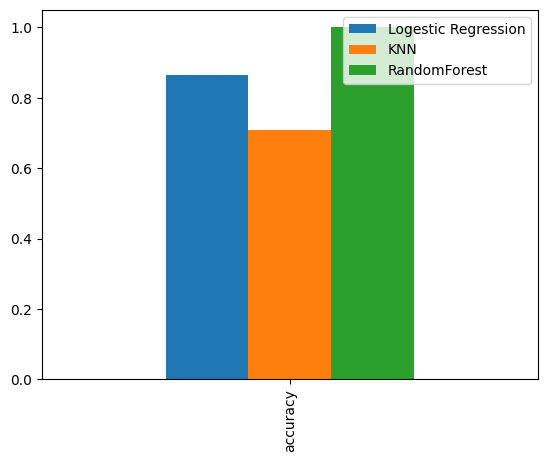

In [67]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.plot.bar();

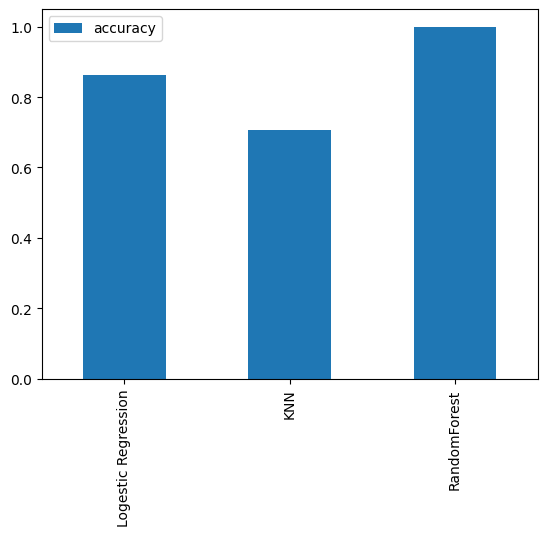

In [68]:
model_compare.T.plot.bar();

### Improve the Models 
* Hyperparameter Tuning 
* Feature Importance
* Confusion Matrix
* Cross Validation
* Recall
* Precision
* F1 score
* Classification Report 
* ROC Curve
* Area Under The Curve (AUC)

In [69]:
# Lets Tune KNN
train_scores = []
test_scores = []

# create a list for different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instances 
knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # fit the model
    knn.fit(x_train,y_train)

    # Update the training score list
    train_scores.append(knn.score(x_train,y_train))

    # Update the testing score list 
    test_scores.append(knn.score(x_test,y_test))
    

In [70]:
train_scores

[1.0,
 0.9975609756097561,
 0.9914634146341463,
 0.9292682926829269,
 0.8987804878048781,
 0.8219512195121951,
 0.7878048780487805,
 0.7792682926829269,
 0.7682926829268293,
 0.7573170731707317,
 0.7597560975609756,
 0.7597560975609756,
 0.7804878048780488,
 0.7646341463414634,
 0.7597560975609756,
 0.7670731707317073,
 0.776829268292683,
 0.7792682926829269,
 0.7951219512195122,
 0.7963414634146342]

In [71]:
test_scores

[1.0,
 0.9804878048780488,
 0.926829268292683,
 0.8,
 0.7073170731707317,
 0.7268292682926829,
 0.6878048780487804,
 0.7121951219512195,
 0.7121951219512195,
 0.7365853658536585,
 0.6878048780487804,
 0.7121951219512195,
 0.7268292682926829,
 0.7463414634146341,
 0.7317073170731707,
 0.7317073170731707,
 0.7268292682926829,
 0.7268292682926829,
 0.7268292682926829,
 0.7317073170731707]

The KNN score on test data :100.00%


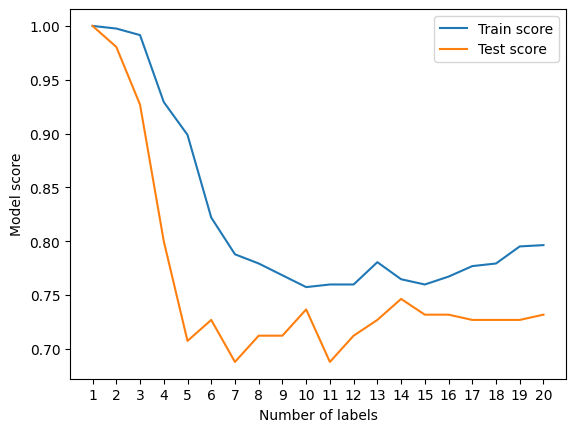

In [72]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of labels")
plt.ylabel("Model score")
plt.legend()

print(f"The KNN score on test data :{max(test_scores)*100:.2f}%")

### Hyperparameter Tuning with RandomizedSearchCV
Models:
* LogisticRegression
* RandomForestClassifier()

In [73]:
# Create hyperparameter for LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}

# Create hyperparameter for RandomForestClassifier()
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

In [74]:
# Tune LogisticRegression Model
np.random.seed(32)

# Setup Random Hyperparameter for search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose =True)

# Fit Random Hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [75]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(4.281332398719396)}

In [76]:
 rs_log_reg.score(x_test,y_test)

0.8682926829268293

In [77]:
# Tune RandomForestClassifier()
np.random.seed(32)
# setup random hyperparamter for search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose =True)
# fit random hyperparamter  search model for RandomForestClassifier
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [78]:
rs_rf.best_params_

{'n_estimators': np.int64(760),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(1),
 'max_depth': None}

In [79]:
rs_rf.score(x_test,y_test)

1.0

### Hyperparameter tunning with GridSearchCV

In [80]:
#Different hyperparameters for logisticRegression Model
log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver":["liblinear"]}

#Setup Grid hyperparamter search for LogisticRegression
gs_log_grid = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
#Fit Grid hyperparamter search model
gs_log_grid.fit(x_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,LogisticRegression()
,param_grid,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [81]:
gs_log_grid.best_params_

{'C': np.float64(2.592943797404667), 'solver': 'liblinear'}

In [82]:
# Evaluate Grid search LogisticRegression Model 
gs_log_grid.score(x_test,y_test)

0.8731707317073171

## Predictions

In [83]:
y_preds = gs_log_grid.predict(x_test)

In [84]:
y_preds

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1])

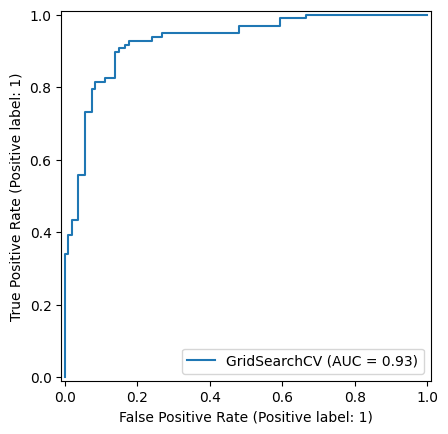

In [87]:
#ROC Curve
RocCurveDisplay.from_estimator(gs_log_grid, x_test, y_test);

In [88]:
# Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[90 18]
 [ 8 89]]


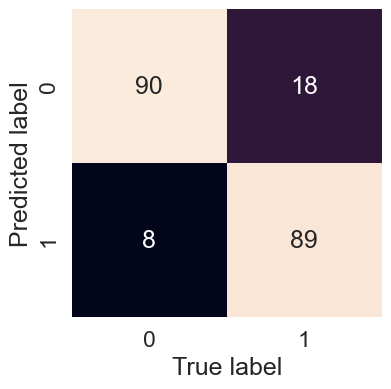

In [91]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(4,4))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot= True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test,y_preds)

In [92]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       108
           1       0.83      0.92      0.87        97

    accuracy                           0.87       205
   macro avg       0.88      0.88      0.87       205
weighted avg       0.88      0.87      0.87       205



In [93]:
gs_log_grid.best_params_

{'C': np.float64(2.592943797404667), 'solver': 'liblinear'}

In [94]:
model = LogisticRegression(C=2.592943797404667,solver="liblinear") 

In [95]:
cv_acc = cross_val_score(model,x,y,cv=5,scoring="accuracy")
cv_acc

array([0.88780488, 0.85365854, 0.87804878, 0.8195122 , 0.7902439 ])

In [107]:
acc=np.mean(cv_acc)
acc

np.float64(0.8458536585365855)

In [98]:
cv_precision = cross_val_score(model,x,y,cv=5,scoring="precision")
cv_precision

array([0.85964912, 0.83783784, 0.85087719, 0.78813559, 0.76923077])

In [108]:
pre=np.mean(cv_precision)
pre

np.float64(0.8211461032156839)

In [100]:
cv_f1 = cross_val_score(model,x,y,cv=5,scoring="f1")
cv_f1

array([0.89497717, 0.86111111, 0.88584475, 0.83408072, 0.80717489])

In [109]:
f1=np.mean(cv_f1)
f1

np.float64(0.8566377268600991)

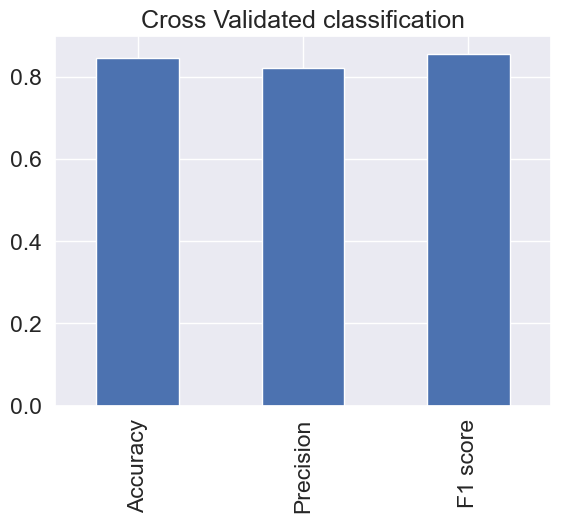

In [112]:
cv_metrics =pd.DataFrame({"Accuracy":acc,
                         "Precision":pre,
                         "F1 score":f1},
                        index=[0])
cv_metrics.T.plot.bar(title="Cross Validated classification",
                     legend=False);